The K-means clustering algorithm computes centroids and repeats until the optimal centroid is found. 
In this method, data points are assigned to clusters in such a way that the sum of the squared distances between the data points and the centroid is as small as possible.
Code for clustering using Word2Vec
https://dylancastillo.co/nlp-snippets-cluster-documents-using-word2vec/#:~:text=Learn%20how%20to%20cluster%20documents,create%20groups%20of%20news%20articles.

249


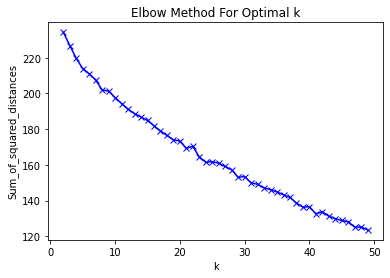

In [ ]:
import pandas as pd
from wordcloud import WordCloud
queries = pd.read_csv("/content/drive/MyDrive/Tutorials/VJIET/Day2/Query.tsv",dtype=str,encoding='ISO-8859-1')
from sklearn.feature_extraction.text import TfidfVectorizer
query_lst=[]
print(len(queries))
for i in range(1,len(queries)):
    query_lst.append(queries['Query'][i])

# Converting to vector
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(query_lst)
#plot the distances
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(2,50)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(X)
   Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()



     cluster
247        0
52         0
110        0
117        0
204        0
..       ...
141       24
156       24
126       24
239       24
224       24

[248 rows x 1 columns]
248
Cluster: 0


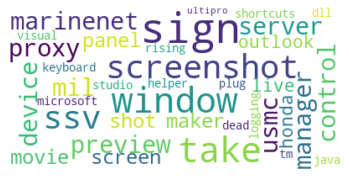

Cluster: 1


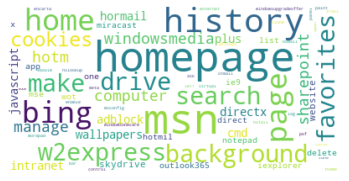

Cluster: 2


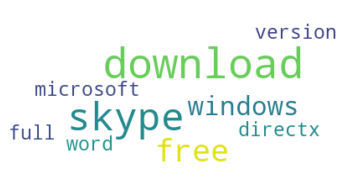

Cluster: 3


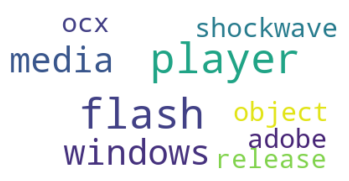

Cluster: 4


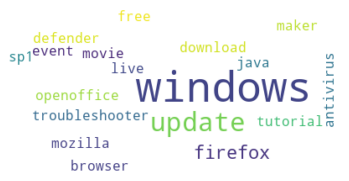

Cluster: 5


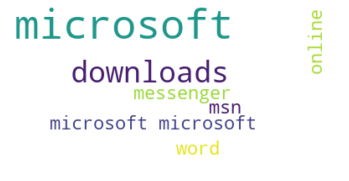

Cluster: 6


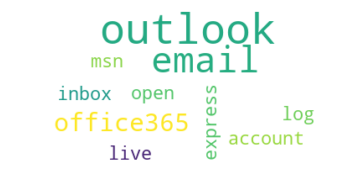

Cluster: 7


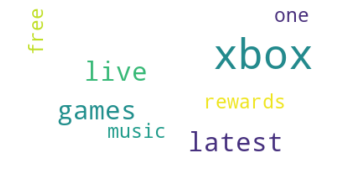

Cluster: 8


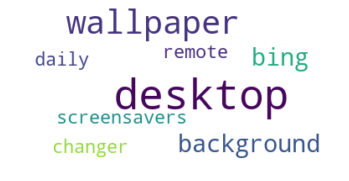

Cluster: 9


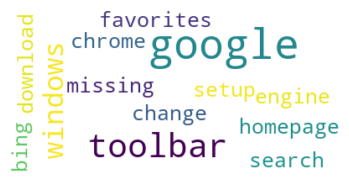

Cluster: 10


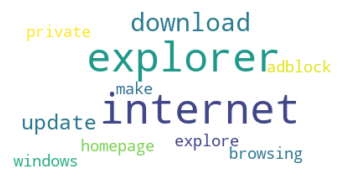

Cluster: 11


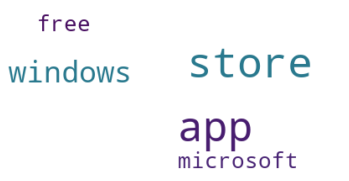

Cluster: 12


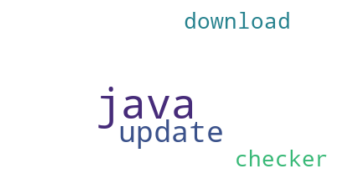

Cluster: 13


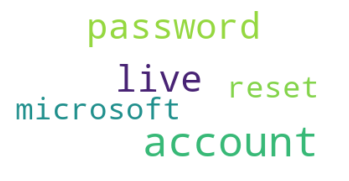

Cluster: 14


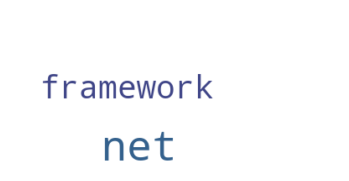

Cluster: 15


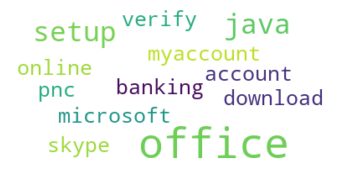

Cluster: 16


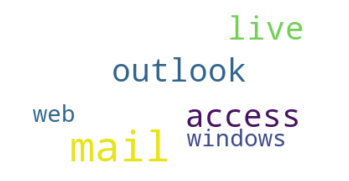

Cluster: 17


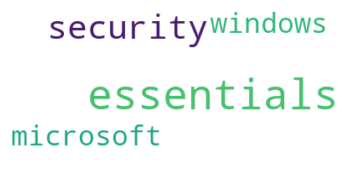

Cluster: 18


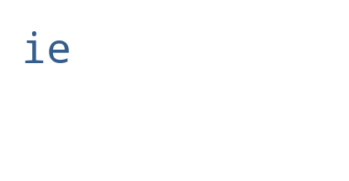

Cluster: 19


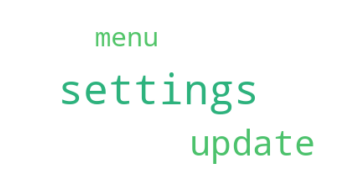

Cluster: 20


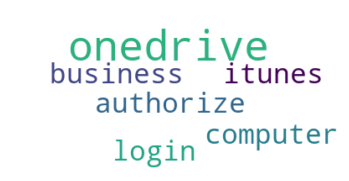

Cluster: 21


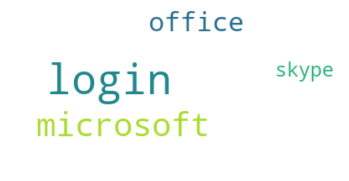

Cluster: 22


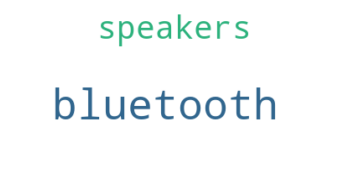

Cluster: 23


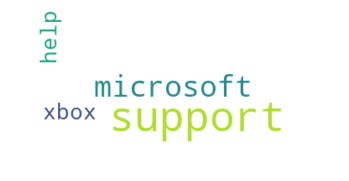

Cluster: 24


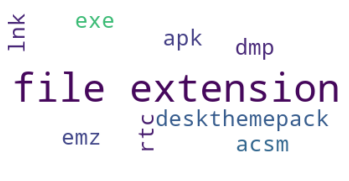

In [ ]:
true_k = 25
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_
query_cl=pd.DataFrame(list(zip(labels)),columns=['cluster'])
print(query_cl.sort_values(by=['cluster']))
result={'cluster':labels,'query':query_lst}
print(len(labels))

result=pd.DataFrame(result)
for k in range(0,true_k):
   s=result[result.cluster==k]
   text=s['query'].str.cat(sep=' ')
   text=text.lower()
   text=' '.join([word for word in text.split()])
   wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
   print('Cluster: {}'.format(k))
   
   #titles=wiki_cl[wiki_cl.cluster==k]['title']         
   #print(titles.to_string(index=False))
   plt.figure()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
   plt.show()

Cluster: 0


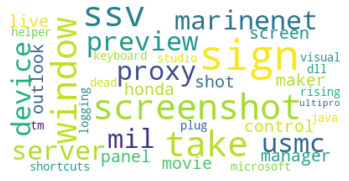

Cluster: 1


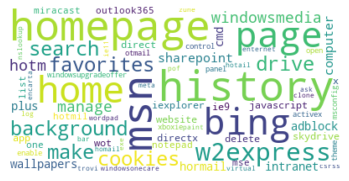

Cluster: 2


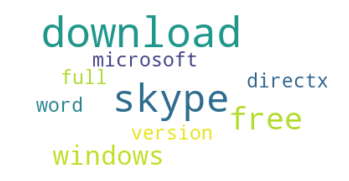

Cluster: 3


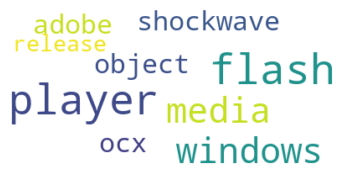

Cluster: 4


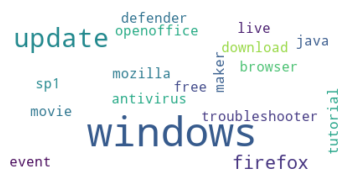

Cluster: 5


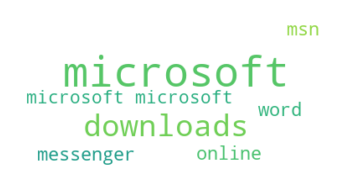

Cluster: 6


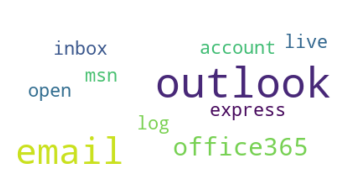

Cluster: 7


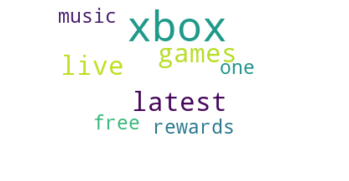

Cluster: 8


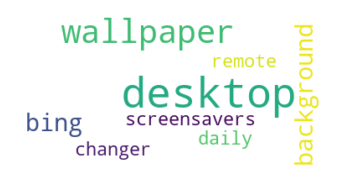

Cluster: 9


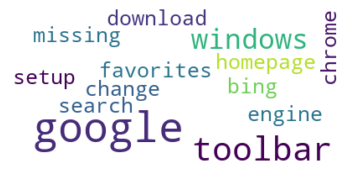

Cluster: 10


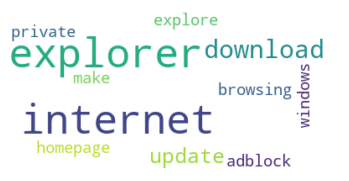

Cluster: 11


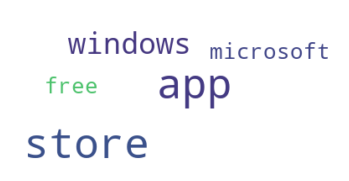

Cluster: 12


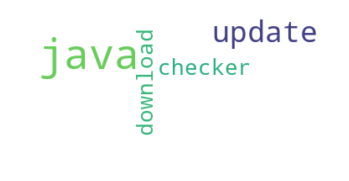

Cluster: 13


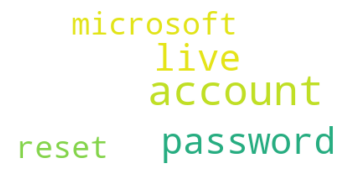

Cluster: 14


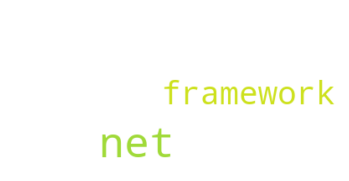

Cluster: 15


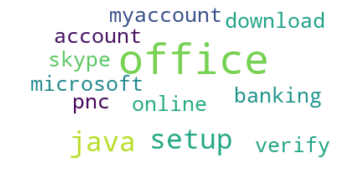

Cluster: 16


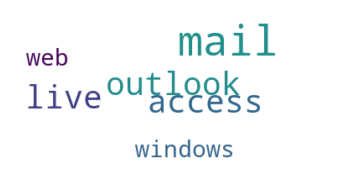

Cluster: 17


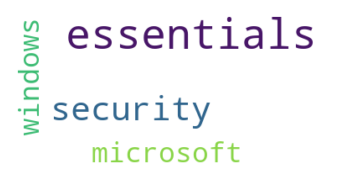

Cluster: 18


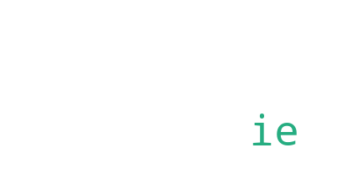

Cluster: 19


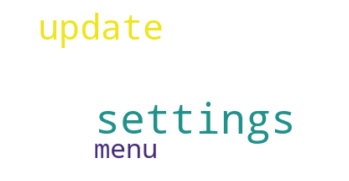

Cluster: 20


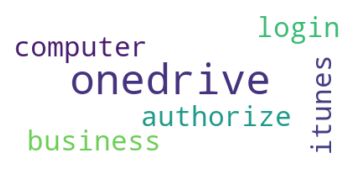

Cluster: 21


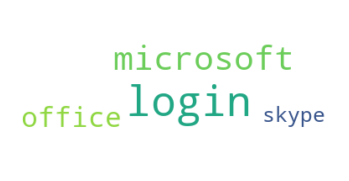

Cluster: 22


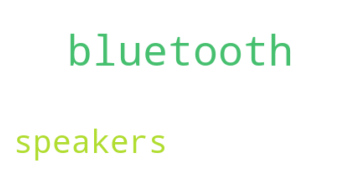

Cluster: 23


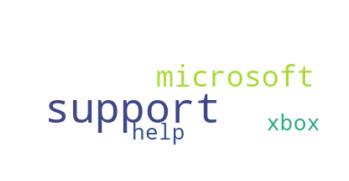

Cluster: 24


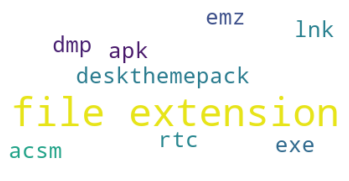

In [ ]:
for k in range(0,true_k):
   s=result[result.cluster==k]
   text=s['query'].str.cat(sep=' ')
   text=text.lower()
   text=' '.join([word for word in text.split()])
   wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
   print('Cluster: {}'.format(k))
   
   #titles=wiki_cl[wiki_cl.cluster==k]['title']         
   #print(titles.to_string(index=False))
   plt.figure()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
   plt.show()

In [ ]:
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score
from sklearn.cluster import KMeans
true_k = 25
se = [] 
sil_scores = []
calinski_score = []
davies_score = []
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_
se.append(model.inertia_)
sil_scores.append(silhouette_score(X, labels))
print('Intertia at K =', true_k, ':', model.inertia_)
print("Silhouette Coefficient: %0.3f" % silhouette_score(X, labels))
print("---------------------------------------------------------------")

query_cl=pd.DataFrame(list(zip(labels)),columns=['cluster'])
print(query_cl.sort_values(by=['cluster']))
result={'cluster':labels,'query':query_lst}
print(len(labels))

result=pd.DataFrame(result)


Intertia at K = 25 : 160.84538249734555
Silhouette Coefficient: 0.130
---------------------------------------------------------------
     cluster
247        0
52         0
210        0
48         0
217        0
..       ...
110       23
226       24
102       24
166       24
22        24

[248 rows x 1 columns]
248


In [ ]:
for k in range(0,true_k):
   s=result[result.cluster==k]
   text=s['query'].str.cat(sep=' ')
   text=text.lower()
   text=' '.join([word for word in text.split()])
   wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
   print('Cluster: {}'.format(k))
   
   #titles=wiki_cl[wiki_cl.cluster==k]['title']         
   #print(titles.to_string(index=False))
   plt.figure()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
   plt.show()